In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import cv2
import numpy as np

## Convolución

In [2]:
M = np.random.randint(1,10,size=(8,8))
M

array([[4, 5, 8, 3, 8, 9, 4, 1],
       [6, 4, 1, 8, 2, 7, 5, 6],
       [1, 2, 3, 4, 8, 6, 1, 2],
       [9, 8, 6, 6, 4, 5, 2, 2],
       [4, 7, 8, 6, 3, 7, 9, 5],
       [2, 4, 4, 7, 9, 2, 4, 2],
       [5, 3, 5, 4, 6, 4, 7, 5],
       [2, 8, 3, 4, 9, 1, 8, 6]])

In [3]:
row, col = M.shape
X = np.zeros((row,col))
X

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
k = np.array([[0, 1, 0], [-1, 0, -1],[0,1,0]])
k

array([[ 0,  1,  0],
       [-1,  0, -1],
       [ 0,  1,  0]])

In [5]:
M[:3,:3]

array([[4, 5, 8],
       [6, 4, 1],
       [1, 2, 3]])

In [6]:
np.sum(M[:3,:3]*k)/9

0.0

In [7]:
for i in range(1,row-1):
    for j in range(1,col-1):
        p = M[i-1:i+2,j-1:j+2]#filas:columnas
        s = np.sum(p*k)/9
        X[i,j] = s

In [8]:
X

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.11111111,  0.44444444,  0.11111111,
         0.88888889, -0.88888889,  0.        ],
       [ 0.        ,  0.88888889,  0.11111111,  0.33333333, -0.44444444,
         0.33333333, -0.11111111,  0.        ],
       [ 0.        , -0.66666667, -0.33333333,  0.        ,  0.        ,
         0.77777778,  0.33333333,  0.        ],
       [ 0.        ,  0.        , -0.33333333,  0.22222222,  0.        ,
        -0.55555556, -0.66666667,  0.        ],
       [ 0.        ,  0.44444444,  0.22222222, -0.33333333,  0.        ,
        -0.22222222,  1.33333333,  0.        ],
       [ 0.        ,  0.22222222,  0.        ,  0.        ,  1.11111111,
        -1.11111111,  0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [35]:
def convolucion(M,F):
    row, col = M.shape
    x = np.zeros((row,col))
    
    for i in range(1,row-1):
        for j in range(1,col-1):
            p = M[i-1:i+2,j-1:j+2]#filas:columnas
            s = np.sum(p*F)/9
            x[i,j] = s
    return x.astype('uint8') 

In [10]:
convolucion(M,k)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.11111111,  0.44444444,  0.11111111,
         0.88888889, -0.88888889,  0.        ],
       [ 0.        ,  0.88888889,  0.11111111,  0.33333333, -0.44444444,
         0.33333333, -0.11111111,  0.        ],
       [ 0.        , -0.66666667, -0.33333333,  0.        ,  0.        ,
         0.77777778,  0.33333333,  0.        ],
       [ 0.        ,  0.        , -0.33333333,  0.22222222,  0.        ,
        -0.55555556, -0.66666667,  0.        ],
       [ 0.        ,  0.44444444,  0.22222222, -0.33333333,  0.        ,
        -0.22222222,  1.33333333,  0.        ],
       [ 0.        ,  0.22222222,  0.        ,  0.        ,  1.11111111,
        -1.11111111,  0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [11]:
img = "gato.jpg"
imagen = cv2.imread(img)
imagen.shape 

(343, 610, 3)

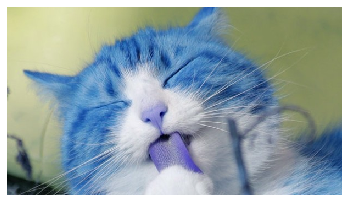

In [12]:
plt.imshow(imagen)##imagen en BGR
plt.axis('off')
plt.show()

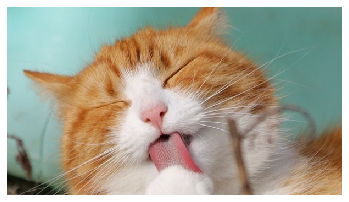

In [18]:
imagen2_RGB = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
plt.imshow(imagen2_RGB)##imagen en RGB
plt.axis('off')
plt.show()

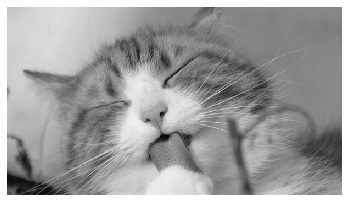

In [19]:
imagen2_G = cv2.cvtColor(imagen2_RGB,cv2.COLOR_BGR2GRAY)
imagen2_GRAY = cv2.cvtColor(imagen2_G,cv2.COLOR_GRAY2BGR)
plt.imshow(imagen2_GRAY)##imagen en RGB
plt.axis('off')
plt.show()

In [20]:
imagen2_GRAY.shape

(343, 610, 3)

In [21]:
B = imagen[:,:,0]
G = imagen[:,:,1]
R = imagen[:,:,2]
#B.shape #
B = B.astype(int)# PASATE A TIPO ENTERO
G = G.astype(int)
R = R.astype(int)

In [26]:
promedio = (B+G+R)/3
promedio = promedio.astype('uint8') ##

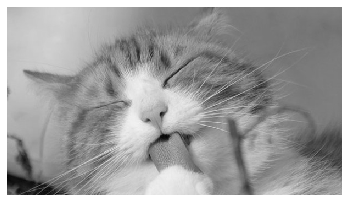

In [27]:
promedio_BGR = cv2.cvtColor(promedio, cv2.COLOR_GRAY2BGR)
plt.imshow(promedio_BGR)
plt.axis('off')
plt.show()

In [28]:
promedio.shape

(343, 610)

In [36]:
img_cnv = convolucion(promedio,k)
#img_cnv = img_cnv.astype('uint8') ##tranformacion
img_cnv.shape

(343, 610)

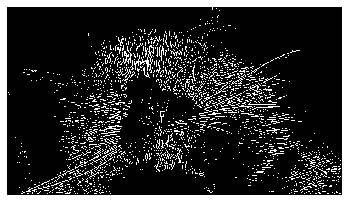

In [37]:
img_cnv_BGR = cv2.cvtColor(img_cnv, cv2.COLOR_GRAY2BGR)
plt.imshow(img_cnv_BGR)
plt.axis('off')
plt.show()

In [34]:
def getPromedio(imagen):
    B = imagen[:,:,0]
    G = imagen[:,:,1]
    R = imagen[:,:,2]
    #B.shape #
    B = B.astype(int)# PASATE A TIPO ENTERO
    G = G.astype(int)
    R = R.astype(int)
    promedio = (B+G+R)/3
    promedio = promedio.astype('uint8') ##
    return promedio

## Pruebas

In [38]:
img = "perro.jpg"
imagen = cv2.imread(img)
imagen.shape

(500, 720, 3)

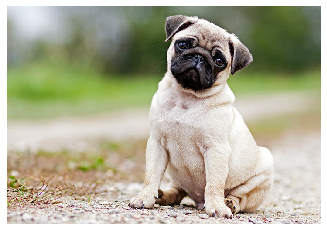

In [39]:
imagen2_RGB = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
plt.imshow(imagen2_RGB)##imagen en RGB
plt.axis('off')
plt.show()

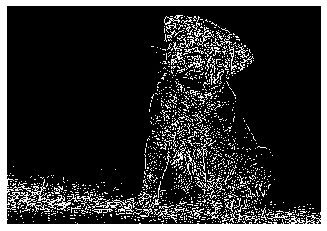

In [41]:
prom = getPromedio(imagen)
img_cnv = convolucion(prom,k)

img_cnv_BGR = cv2.cvtColor(img_cnv, cv2.COLOR_GRAY2BGR)
plt.imshow(img_cnv_BGR)
plt.axis('off')
plt.show()

(-0.5, 719.5, 499.5, -0.5)

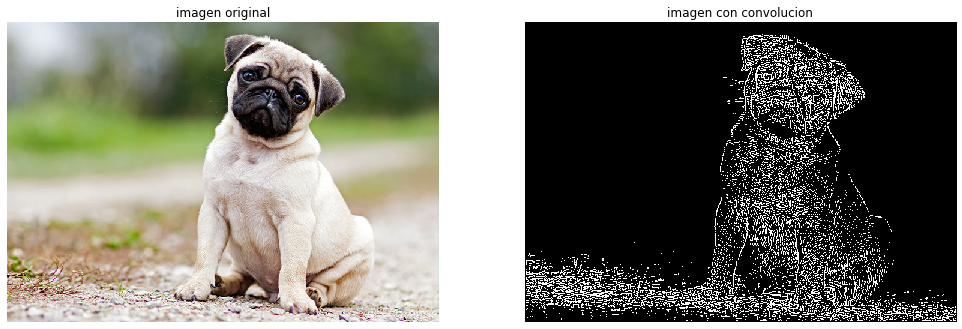

In [42]:
plt.figure(figsize=(17, 8))
plt.subplot(1, 2, 1)
plt.imshow(imagen2_RGB)
plt.title("imagen original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_cnv_BGR)
plt.title("imagen con convolucion")
plt.axis('off')